In [4]:
import numpy as numpy
import pandas as pd 

# Preparation des donnees

In [5]:
df = pd.read_csv('../data/train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Preparation des données

### Les variables Numériques

#### Calcul des Statistiques de base : moyenne, médiane, écart-type, valeurs manquantes


- La moyenne

In [8]:
df.mean(numeric_only=True)

ApplicantIncome      5403.459283
CoapplicantIncome    1621.245798
LoanAmount            146.412162
Loan_Amount_Term      342.000000
Credit_History          0.842199
dtype: float64

- La mediane

In [9]:
df.median(numeric_only=True)

ApplicantIncome      3812.5
CoapplicantIncome    1188.5
LoanAmount            128.0
Loan_Amount_Term      360.0
Credit_History          1.0
dtype: float64

- l'ecart type

In [10]:
df.std(numeric_only=True)

ApplicantIncome      6109.041673
CoapplicantIncome    2926.248369
LoanAmount             85.587325
Loan_Amount_Term       65.120410
Credit_History          0.364878
dtype: float64

- Les valeurs Manquantes

In [11]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Histogrammes avec matplotlib ou seaborn

In [12]:
import matplotlib as plt
import seaborn as sns

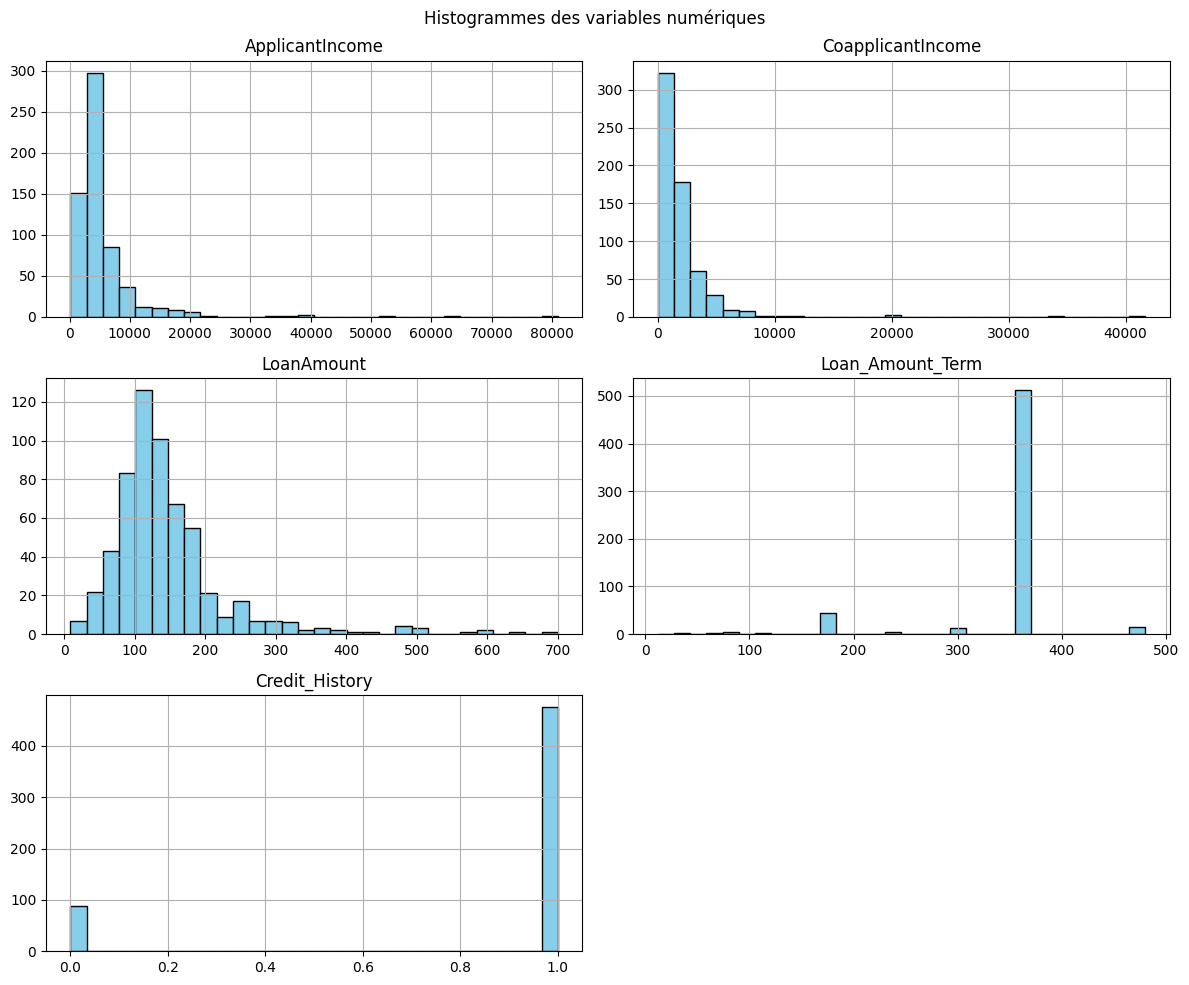

In [13]:
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histogrammes des variables numériques")
plt.tight_layout()
plt.show()

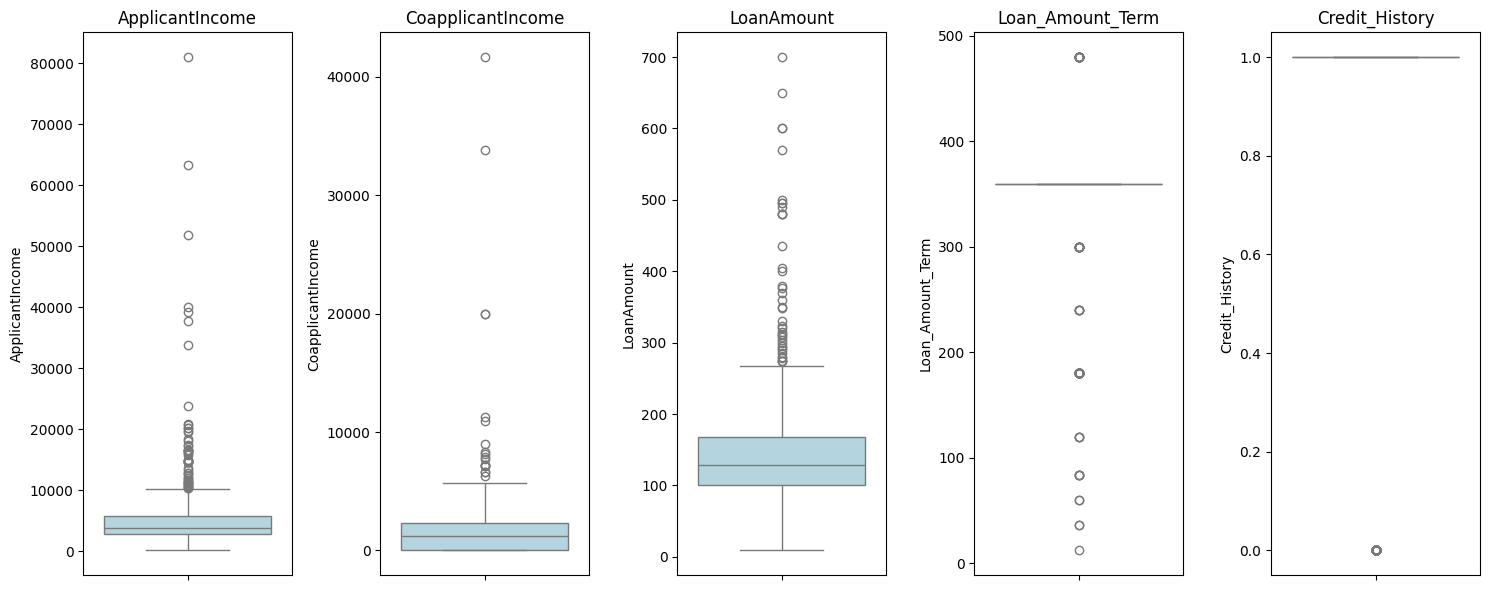

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélection automatique des colonnes numériques
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Création des box plots
plt.figure(figsize=(15, 6))

for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i + 1)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(col)
    plt.tight_layout()

plt.show()


### 2. Variables catégorielles

In [15]:
print(df['Gender'].value_counts())
print(df['Married'].value_counts())
print(df['Education'].value_counts())
print(df['Property_Area'].value_counts())


Gender
Male      489
Female    112
Name: count, dtype: int64
Married
Yes    398
No     213
Name: count, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


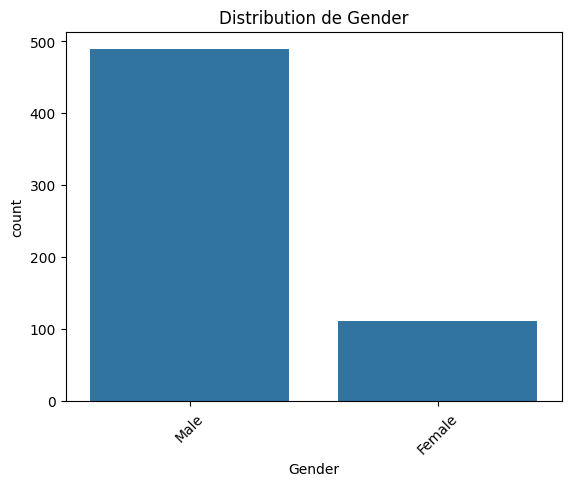

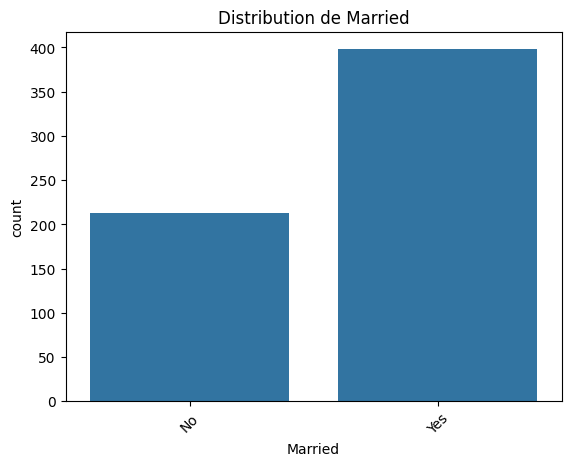

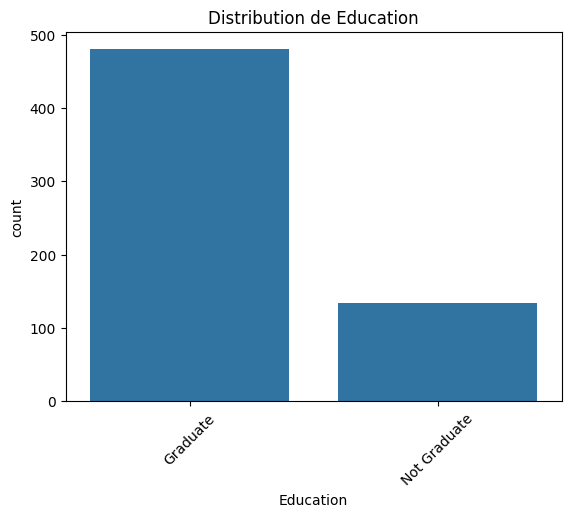

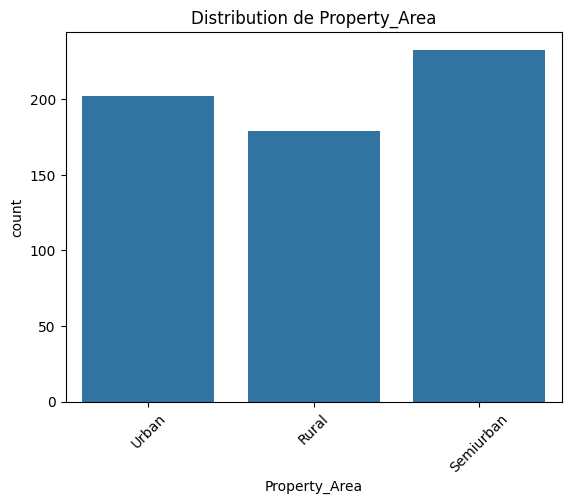

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_vars = ['Gender','Married', 'Education', 'Property_Area']

for var in cat_vars:
    sns.countplot(x=var, data=df)
    plt.title(f"Distribution de {var}")
    plt.xticks(rotation=45)
    plt.show()


In [17]:
missing = df.isnull().sum()
# on divise le nombre de valeurs manquantes par le nombre total de lignes pour chaque colonne.
# on multiplie par 100 → tu obtiens le pourcentage de données manquantes pour chaque colonne.
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Valeurs manquantes': missing, 'Pourcentage (%)': missing_percent})
# on n’affiches que les variables qui ont au moins une valeur manquante.
print(missing_df[missing_df['Valeurs manquantes'] > 0])

                  Valeurs manquantes  Pourcentage (%)
Gender                            13         2.117264
Married                            3         0.488599
Dependents                        15         2.442997
Self_Employed                     32         5.211726
LoanAmount                        22         3.583062
Loan_Amount_Term                  14         2.280130
Credit_History                    50         8.143322


In [18]:
print(df['Loan_Status'].value_counts())


Loan_Status
Y    422
N    192
Name: count, dtype: int64


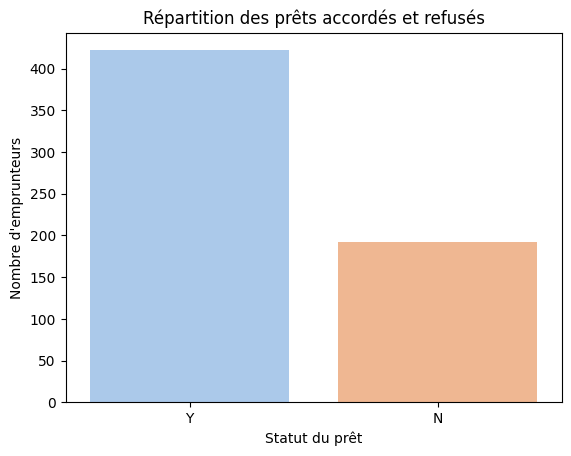

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir les comptes en DataFrame
loan_df = df['Loan_Status'].value_counts().reset_index()
loan_df.columns = ['Loan_Status', 'Count']

# Tracer avec hue et palette
sns.barplot(data=loan_df, x='Loan_Status', y='Count', hue='Loan_Status', palette='pastel', legend=False)

plt.title("Répartition des prêts accordés et refusés")
plt.xlabel("Statut du prêt")
plt.ylabel("Nombre d'emprunteurs")
plt.show()


In [20]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Nettoyage des données

### Imputation des Valeurs Manquantes (NaN)

In [52]:
# Catégorielles : Remplacement par la valeur la plus fréquente (mode)
df['Gender']= df['Gender'].fillna('Other')
df['Married']= df['Married'].fillna('Other')
df['Education']= df['Education'].fillna('Other')
df['Dependents']= df['Dependents'].fillna(0)
df['Self_Employed']=df['Self_Employed'].fillna('Other')


# Numériques : Remplacement par la médiane ou mode selon la nature
df['LoanAmount']= df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(0)
df['Credit_History']= df['Credit_History'].fillna(0)




In [53]:
df.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area        535
Loan_Status          535
dtype: int64

### Gestion des outliers

In [44]:
colonnes_outliers = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

for col in colonnes_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    borne_inf = Q1 - 1.5 * IQR
    borne_sup = Q3 + 1.5 * IQR

    outliers = df[(df[col] < borne_inf) | (df[col] > borne_sup)]
    print(f"\nColonne : {col}")
    print(f"Q1 = {Q1}")
    print(f"Q3 = {Q3}")
    print(f"IQR = {IQR}")
    print(f"Borne inférieure = {borne_inf}")
    print(f"Borne supérieure = {borne_sup}")
    print(f"Nombre d'outliers détectés : {len(outliers)}")



Colonne : ApplicantIncome
Q1 = 2752.5
Q3 = 4891.0
IQR = 2138.5
Borne inférieure = -455.25
Borne supérieure = 8098.75
Nombre d'outliers détectés : 25

Colonne : CoapplicantIncome
Q1 = 0.0
Q3 = 2194.0
IQR = 2194.0
Borne inférieure = -3291.0
Borne supérieure = 5485.0
Nombre d'outliers détectés : 6

Colonne : LoanAmount
Q1 = 100.0
Q3 = 151.5
IQR = 51.5
Borne inférieure = 22.75
Borne supérieure = 228.75
Nombre d'outliers détectés : 17


In [45]:
# SUPRESSION DES OUTILIERS 

borne_inf_applicant = -1498.75
borne_sup_applicant = 10171.25

borne_inf_coapplicant = -3445.875
borne_sup_coapplicant = 5743.125

borne_inf_loan = 3.5
borne_sup_loan = 261.5

# Suppression des outliers pour toutes les colonnes concernées
df = df[
    (df['ApplicantIncome'] >= borne_inf_applicant) & (df['ApplicantIncome'] <= borne_sup_applicant) &
    (df['CoapplicantIncome'] >= borne_inf_coapplicant) & (df['CoapplicantIncome'] <= borne_sup_coapplicant) &
    (df['LoanAmount'] >= borne_inf_loan) & (df['LoanAmount'] <= borne_sup_loan)
]


# la methode Z-score



In [46]:
# Vérification après nettoyage
print(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].describe())


       ApplicantIncome  CoapplicantIncome  LoanAmount
count       535.000000         535.000000  535.000000
mean       4053.818692        1322.784897  126.357009
std        1853.376675        1421.206067   44.455651
min         150.000000           0.000000    9.000000
25%        2752.500000           0.000000  100.000000
50%        3598.000000        1260.000000  124.000000
75%        4891.000000        2194.000000  151.500000
max       10139.000000        5701.000000  260.000000


# Transformation des donnees

### Encodage

In [47]:
### Transformons les colonnes categorielles en numerique 
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})  # Cible


In [51]:
### La colonne Dependents a des valeurs comme 0, 1, 2, 3+. On transforme 3+ en 3
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)


ValueError: invalid literal for int() with base 10: 'Other'

In [49]:
### One-Hot Encoding : pour les colonnes avec plus de 2 catégories (comme Property_Area),
# Cela va créer 2 nouvelles colonnes : Urban et Rural 
#df = pd.get_dummies(df, columns=['Property_Area'], drop_first=True)
df['Property_Area'] = df['Property_Area'].map({'Urban': 1, 'Rural': 0, 'Sermiurban':2})
# Il va :
# Créer des colonnes pour chaque valeur (Rural, Semiurban, etc
# Mettre 1 si c’est vrai, 0 sinon.
# Supprimer la première catégorie (ici : Urban), pour éviter les répétitions inutiles.
# label Incoding


#### Standardisation 

In [ ]:
### Certaines colonnes ont des chiffres beaucoup plus grands que d'autres 
# Les modèles peuvent mal apprendre si les échelles sont trop différentes 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = scaler.fit_transform(
    df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
)

# ce code permet de rendre les valeurs des colonnes sur le mm echelle 

### Création de nouvelles variables pertinentes (Feature Engineering)

In [135]:
# TotalIncome (Addition des revenus du demandeur principal et du co-demandeur.
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [136]:
# EMI (Mensualité) = Estimation de la mensualité à rembourser.
df['EMI'] = df['LoanAmount'] / df['Loan_Amount_Term']
# Cette colonne calcule combien la personne devra payer chaque mois pour rembourser son prêt.

In [137]:
# Debt-to-Income Ratio (DTI) = Rapport entre la mensualité estimée et le revenu total.
df['Debt_to_Income'] = df['EMI'] / df['TotalIncome']
# cette ligne est important parceque si la personne rembourse plus de 50% de son revenu y'a probleme 

In [138]:
# Verifions les colonnes nouvellements ajoutees 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,EMI,Debt_to_Income
0,LP001002,1,0,0,1,0,0.969507,-0.931619,0.036993,360.0,1.0,1,False,True,0.037888,0.000103,0.002712
1,LP001003,1,1,1,1,0,0.285790,0.130444,0.036993,360.0,1.0,0,False,False,0.416234,0.000103,0.000247
2,LP001005,1,1,0,1,1,-0.569126,-0.931619,-1.358961,360.0,1.0,1,False,True,-1.500745,-0.003775,0.002515
3,LP001006,1,1,0,0,0,-0.794331,0.729088,-0.143130,360.0,1.0,1,False,True,-0.065244,-0.000398,0.006094
4,LP001008,1,0,0,1,0,1.051056,-0.931619,0.329693,360.0,1.0,1,False,True,0.119437,0.000916,0.007668


### Application de SMOTE sur les données encodées
###### SMOTE = il fabrique de nouvelles données similaires à celles qui sont rares, pour que ton modèle apprenne à bien reconnaître toutes les classes, même les petites.

In [139]:
# Supprimons la colonne Loan_ID , car SMOTE (comme tous les algorithmes de ML) ne sait pas gérer des chaînes de caractères
df = df.drop('Loan_ID', axis=1)

In [140]:
# Séparation des variables et de la cible
# Je prends toutes les colonnes sauf Loan_Status pour les mettre dans X (les données d'entrée). 
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']


In [141]:
# Application de SMOTE 
from imblearn.over_sampling import SMOTE
# Utilise toujours la même base d’aléatoire pour que j’obtienne les mêmes résultats à chaque fois.
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [142]:
# VERIFICATIONS , on doit avoir un resultat equilibre 
import numpy as np

unique, counts = np.unique(y_resampled, return_counts=True)
print(dict(zip(unique, counts)))


{np.int64(0): np.int64(372), np.int64(1): np.int64(372)}


In [54]:
print(df['Dependents'].unique())

['0' '1' '3+' '2' 'Other']
